In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datasets/hhmusedata/exams.csv')

In [3]:
df

,exam_id,acquisition_date,patient_id,age,is_male,weight,height,ventricular_rate,atrial_rate,patient_ID_2,...,AdmissionType_,AdmissionRZP,AdmissionRZP_,VisitReason,VisitReason_,VisitType,VisitType_,DgCode,DischargeTo_Agg,DischargeTo_unit_agg
0,1,01-01-2023,1afba52c8512eec4ad66b9a3f0cbdbfc2f64538d,44,1,-1,-1,140,280,54,...,bez doporučení,NaN,? typ záchranky,3,palpitace,2,opakovaná návštěva,"I48.3: Typický flutter síní, EKV na SR",outpatient,NaN
1,2,01-01-2023,195f58953b88018a04cd265dfa3461dee0ecbdc9,-1,1,-1,-1,61,61,193,...,přes RZP/LSPP,P,Praha,2,dušnost,2,opakovaná návštěva,I50.1: Selhání levé komory,outpatient,NaN
2,3,01-01-2023,d5a4edfaf83ea43eb4e7579519586be3142bbc14,-1,1,-1,-1,118,90,166,...,přes RZP/LSPP,S2,středočeská sekundární,1,bolest na hrudi,1,první návštěva,I21.2: Akutní transmurální infarkt myokardu ji...,cardiology clinic,OIP
3,4,01-01-2023,c054b3f120b4741286d6ff24d2d74d5e6bba8044,59,0,-1,-1,67,67,1267,...,bez doporučení,NaN,? typ záchranky,1,bolest na hrudi,2,opakovaná návštěva,I10: Dekompenzace hypertezne po psychickém roz...,outpatient,NaN
4,5,01-01-2023,1dfee4008a42a65334fdabe38fc95ee189f7e892,-1,1,-1,-1,58,58,1153,...,bez doporučení,NaN,? typ záchranky,1,bolest na hrudi,1,první návštěva,R07.4: Nekardiální bolest na hrudi,outpatient,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23285,23286,12-03-2017,c3fd929cd32c2e139c1f37ed2e872fcf3241999f,79,0,-1,-1,67,56,1895,...,bez doporučení,NaN,? typ záchranky,9,jiný,2,opakovaná návštěva,I50.0: Pravostranná kard. dekompenzace,cardiology clinic,IMP
23286,23287,12-03-2017,f8a650b71995d54093ddbac22e37265fc79b1c4f,57,0,-1,-1,77,77,2653,...,bez doporučení,NaN,? typ záchranky,1,bolest na hrudi,1,první návštěva,"R07.4: Bolest hrudi, vyloučen AKS",outpatient,NaN
23287,23288,12-02-2017,58e369866e7419669075ca45350e98fa34c534dc,33,0,-1,-1,68,68,16896,...,bez doporučení,NaN,? typ záchranky,1,bolest na hrudi,1,první návštěva,R07.2: Bolesti na hrudi v rámci neurastenickéh...,outpatient,NaN
23288,23289,12-03-2017,a468574d6a8f9fc6bcc4228a7f9429f139b770ed,77,1,-1,-1,48,48,18568,...,z ambulance KK IKEM,NaN,? typ záchranky,1,bolest na hrudi,1,první návštěva,I20.0: Nestabilní angina (pectoris),cardiology clinic,other


In [4]:
import matplotlib.pyplot as plt

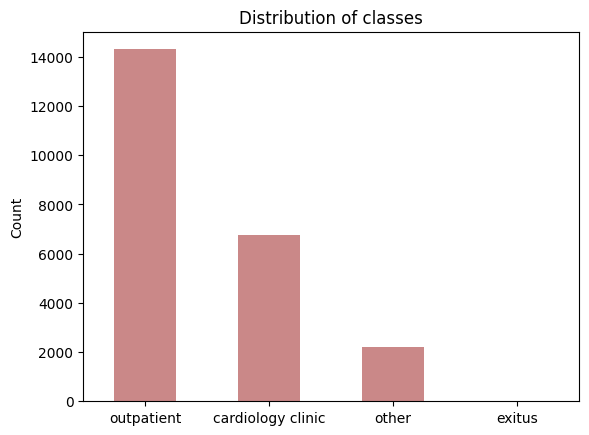

In [121]:
df['DischargeTo_Agg'].value_counts().plot(kind='bar', color='#ca8888')

plt.title('Distribution of classes')
plt.xticks(rotation=0)
plt.xlabel("")
plt.ylabel('Count')
plt.show()

In [6]:
grouped = df.groupby(['DischargeTo_Agg']).size().reset_index(name='Count')
print(grouped)


     DischargeTo_Agg  Count
0  cardiology clinic   6756
1             exitus      1
2              other   2205
3         outpatient  14328


In [7]:
df['DischargeTo_Agg'] = df['DischargeTo_Agg'].fillna('Unknown')
df['DischargeTo_unit_agg'] = df['DischargeTo_unit_agg'].fillna('Unknown')

In [8]:
grouped.reset_index(inplace=True)

grouped.rename(columns={'index': 'hh_class'}, inplace=True)

grouped

,hh_class,DischargeTo_Agg,Count
0,0,cardiology clinic,6756
1,1,exitus,1
2,2,other,2205
3,3,outpatient,14328


In [9]:
df.groupby(['DischargeTo_Agg', 'VisitReason']).size().reset_index(name='Count').pivot_table(index='DischargeTo_Agg', columns='VisitReason', values='Count', aggfunc='sum').fillna(0)

VisitReason,1,2,3,4,9
DischargeTo_Agg,,,,,
cardiology clinic,3055.0,1695.0,361.0,311.0,1334.0
exitus,1.0,0.0,0.0,0.0,0.0
other,307.0,847.0,176.0,62.0,813.0
outpatient,3320.0,1794.0,5419.0,153.0,3642.0


In [10]:
df['dgcode_short'] = df['DgCode'].str.split(':').str[0]

In [11]:
df.groupby(['dgcode_short', 'DischargeTo_Agg']).size().reset_index(name='Count').pivot_table(index='dgcode_short', columns='DischargeTo_Agg', values='Count', aggfunc='sum').fillna(0)

DischargeTo_Agg,cardiology clinic,exitus,other,outpatient
dgcode_short,,,,
A04.8,0.0,0.0,0.0,1.0
A04.9,2.0,0.0,2.0,0.0
A08.1,0.0,0.0,0.0,1.0
A08.4,1.0,0.0,0.0,0.0
A09.0,1.0,0.0,2.0,3.0
...,...,...,...,...
Z95.4,2.0,0.0,1.0,1.0
Z95.8,0.0,0.0,0.0,2.0
Z95.9,0.0,0.0,0.0,2.0


In [12]:
import numpy as np
from scipy.stats import entropy

def calculate_entropy(df, col1, col2):
    # Calculate the probabilities
    probs = pd.crosstab(df[col1], df[col2]) / len(df)

    # Calculate the entropy
    entropy = -np.sum(probs.apply(lambda x: x * np.log2(x)))

    return entropy

In [13]:
calculate_entropy(df, 'dgcode_short', 'DischargeTo_Agg')

/scratch.ssd/sejakm/job_18836707.meta-pbs.metacentrum.cz/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/scratch.ssd/sejakm/job_18836707.meta-pbs.metacentrum.cz/conda/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


DischargeTo_Agg
cardiology clinic    2.063994
exitus               0.000623
other                0.904577
outpatient           3.468118
dtype: float64

In [14]:
from scipy.stats import entropy

def calculate_conditional_entropy(df, X, Y):
    # Calculate the probabilities
    probs = pd.crosstab(df[X], df[Y])

    # Calculate the conditional entropy
    conditional_entropy = np.mean(probs.apply(lambda x: entropy(x), axis=1))

    return conditional_entropy

In [15]:
calculate_conditional_entropy(df, 'dgcode_short', 'DischargeTo_Agg')

0.2671919180025041

In [37]:
ribeiro_preds = pd.read_csv("ribeiro_model_predictions.csv")
df = pd.merge(df, ribeiro_preds, on='exam_id')

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [106]:
# cols_to_use = ['ventricular_rate', 'atrial_rate', 'age', 'AdmissionType',  'VisitReason',]
cols_to_use = ['ventricular_rate', 'atrial_rate', 'age', 'VisitReason', *ribeiro_preds.columns]
# base_cols_to_use = ['ventricular_rate', 'atrial_rate', 'age', 'VisitReason']
cols_to_use.remove('exam_id')
le = LabelEncoder()
df2 = df.copy()
for col in cols_to_use:
    df2[col] = le.fit_transform(df[col].astype(str))


In [107]:
# df2['DischargeTo_Agg'].unique()

df2 = df2[df2['DischargeTo_Agg'].isin(['outpatient', 'cardiology clinic'])]
mapping = {'outpatient': 0, 'cardiology clinic': 1}
df2['DischargeTo_Agg'] = df2['DischargeTo_Agg'].map(mapping)

In [138]:
X = df2[cols_to_use]
y = df2['DischargeTo_Agg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Now you can use the `predict` method of the model to make predictions
# predictions = model.predict(X_test)

# To get the feature importances
importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': cols_to_use, 'importance': importances})
# print(feature_importances.sort_values('importance', ascending=False))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, predictions)
# print('Accuracy: {:.2f}'.format(accuracy))

# cm = confusion_matrix(y_test, predictions)
# print(cm)

Text(0.5, 1.0, 'Feature importance for discharge prediction')

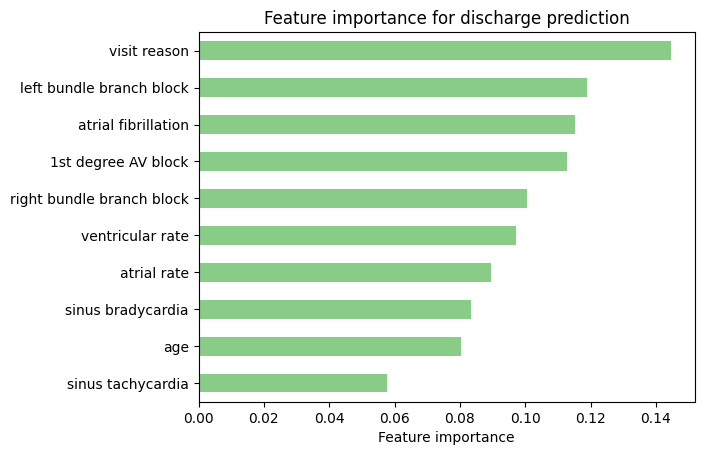

In [153]:
# mapping = {
#     'VisitReason': 'visit reason',
#     'ventricular_rate': 'ventricular rate',
#     'atrial_rate': 'atrial rate',
#     'LBBB': 'left bundle branch block',
#     'AF': 'atrial fibrillation',
#     '1dAVb': '1st degree AV block',
#     'RBBB': 'right bundle branch block',
#     'SB': 'sinus bradycardia',
#     'ST': 'sinus tachycardia',
#     'age': 'age'
# }

# feature_importances['feature'] = feature_importances['feature'].map(mapping)

# feature_importances = feature_importances.sort_values(by='importance', ascending=True)

# Plot the sorted feature importances
ax = feature_importances.plot(kind='barh', x='feature', y='importance', color='#88cc88', legend=None)

ax.set_xlabel("Feature importance")
ax.set_ylabel("")
ax.set_title("Feature importance for discharge prediction")

In [122]:
from sklearn.ensemble import GradientBoostingClassifier
# Assuming X_train, X_test, y_train, y_test are already defined

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=3, loss='exponential')

# Fit the model on the training data
model.fit(X_train, y_train)

# Use the predict method of the model to make predictions on the test data
predictions = model.predict(X_test)

# print(predictions)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: {:.2f}'.format(accuracy))

cm = confusion_matrix(y_test, predictions)
print(cm)

Accuracy: 0.74
[[2458  422]
 [ 677  655]]


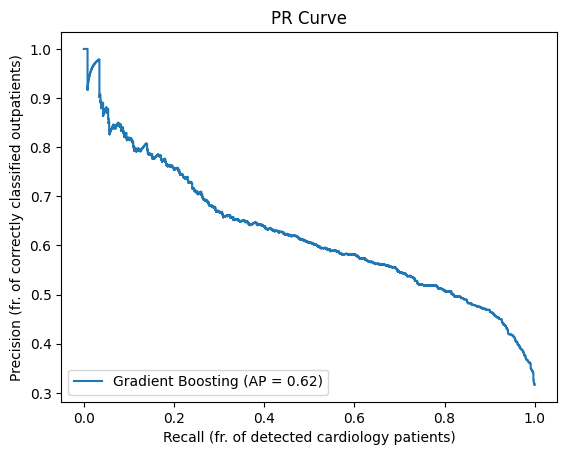

In [96]:
from sklearn.metrics import precision_recall_curve, auc, PrecisionRecallDisplay

probs = model.predict_proba(X_test)[:, 1]

# Compute the precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Compute the AUC value
auc_value = auc(recall, precision)

display = PrecisionRecallDisplay.from_predictions(y_test, probs, name='Gradient Boosting')
_ = display.ax_.set_title("PR Curve")
_ = display.ax_.set_xlabel("Recall (fr. of detected cardiology patients)")
_ = display.ax_.set_ylabel("Precision (fr. of correctly classified outpatients)")


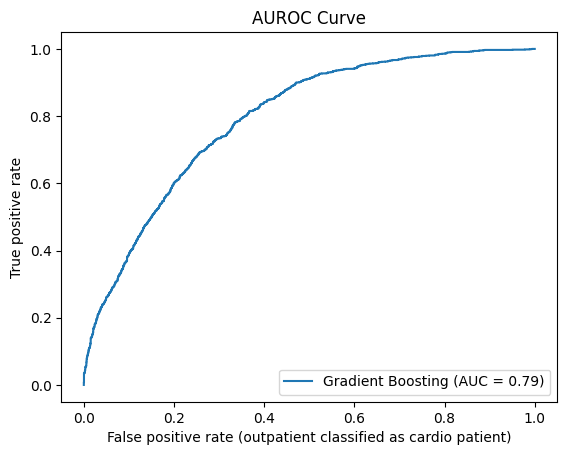

In [99]:
from sklearn.metrics import precision_recall_curve, auc, RocCurveDisplay

probs = model.predict_proba(X_test)[:, 1]

# Compute the precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Compute the AUC value
auc_value = auc(recall, precision)

display = RocCurveDisplay.from_predictions(y_test, probs, name='Gradient Boosting')
_ = display.ax_.set_title("AUROC Curve")
_ = display.ax_.set_xlabel("False positive rate (outpatient classified as cardio patient)")
_ = display.ax_.set_ylabel("True positive rate")

In [124]:
import joblib

joblib.dump(model, 'gbc.pkl')

['gbc.pkl']

In [126]:
loaded_model = joblib.load('gbc.pkl')
predictions = loaded_model.predict(X_test)

# print(predictions)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: {:.2f}'.format(accuracy))

cm = confusion_matrix(y_test, predictions)
print(cm)

Accuracy: 0.74
[[2458  422]
 [ 677  655]]
